# Module 4.4 — Capital Decay & Irreversibility
### Purpose

To demonstrate that:

- drawdowns permanently change the risk landscape
- deep losses require disproportionately large gains to recover
- after sufficient decay, survival depends more on luck than edge

We are not asking:   
>“Can the system recover?”

We are asking:    
>“What does recovery cost, and how often does it actually happen?”

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Simulation 1 — Drawdown vs Required Recovery (Deterministic Geometry)
### let start_capital = 1
*if you lose d (as a fraction)*
### capital after loss = 1 - d    
*to recover to 1, required gain **g** must satisfy*
### (1 - d) x (1 + g) = 1     
*solve for **g***
### g = 1/(1 - d) - 1    

In [2]:
drawdown = np.linspace(0.1, 0.9, 100)  # from 10% to 90% drawdown

required_recovery = 1 / (1-drawdown) -1

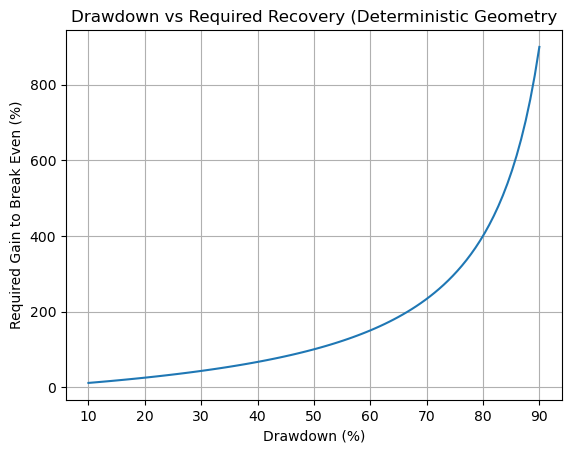

In [3]:
plt.figure()
plt.plot(drawdown*100, required_recovery*100)
plt.title('Drawdown vs Required Recovery (Deterministic Geometry')
plt.xlabel('Drawdown (%)')
plt.ylabel('Required Gain to Break Even (%)')
plt.grid(True)
plt.show()

## Simulation 2 — Shallow vs Deep Drawdown Paths (Same System)
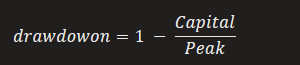

Rearranging:      



In [4]:
n_trades = 1500
n_traders = 5000
p = 0.55
start_capital = 1
risk = 0.01
death_threshold = 0.1   


forced_drawdowns = [0.0, 0.2, 0.4, 0.6, 0.8 , 0.9]  # 0%, 20%, 40%, 60%, 80%, 90%

def run_forced_drawdown_simulation(forced_dd):
    rand_matrix = np.random.rand(n_traders, n_trades)
    recoveries = 0
    ruins = 0
    time_underwater = []

    for r in range(n_traders):
        peak = 1.0
        capital = peak*(1-forced_dd)
        underwater = 0

        for c in range(n_trades):
            bet = capital * risk

            if rand_matrix[r, c] < p:
                capital += bet
            else:
                capital -= bet

            if capital <= death_threshold:
                ruins += 1
                break

            if capital < peak:
                underwater += 1

            if capital >= peak:
                recoveries += 1
                break

        time_underwater.append(underwater)

    return {
        "recovery_prob": recoveries / n_traders,
        "ruin_prob": ruins / n_traders,
        "avg_time_underwater": np.mean(time_underwater)
    } 

results = {}
for dd in forced_drawdowns:
    results[f"{int(dd*100)}% DD"] = run_forced_drawdown_simulation(dd)

for k, v in results.items():
    print(f"\n{k}")
    print(f"Recovery Probability: {v['recovery_prob']:.2f}")
    print(f"Ruin Probability: {v['ruin_prob']:.2f}")
    print(f"Avg Time Underwater: {v['avg_time_underwater']:.1f} trades")


0% DD
Recovery Probability: 1.00
Ruin Probability: 0.00
Avg Time Underwater: 9.4 trades

20% DD
Recovery Probability: 1.00
Ruin Probability: 0.00
Avg Time Underwater: 235.7 trades

40% DD
Recovery Probability: 1.00
Ruin Probability: 0.00
Avg Time Underwater: 546.2 trades

60% DD
Recovery Probability: 0.93
Ruin Probability: 0.00
Avg Time Underwater: 952.1 trades

80% DD
Recovery Probability: 0.36
Ruin Probability: 0.00
Avg Time Underwater: 1420.4 trades

90% DD
Recovery Probability: 0.00
Ruin Probability: 0.90
Avg Time Underwater: 151.4 trades


In [5]:
y = np.linspace(0.1, 0.9, 10)
x = np.array([run_forced_drawdown_simulation(i) for i in y])
x1 = [x[i]['recovery_prob'] for i in range(len(x))]

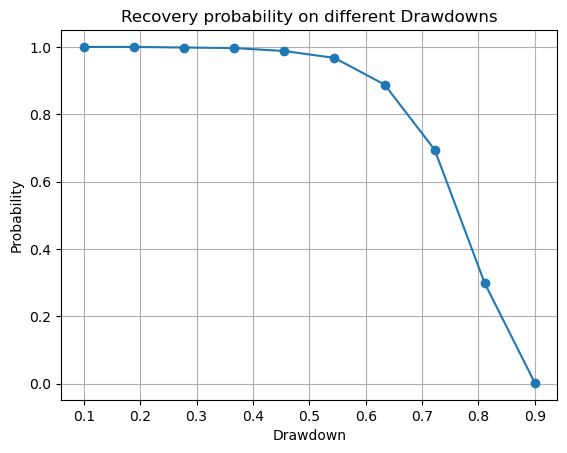

In [6]:
plt.figure()
plt.plot(y, x1, marker ='o')
plt.xlabel("Drawdown")
plt.ylabel("Probability")
plt.title("Recovery probability on different Drawdowns")
plt.grid(True)
plt.show()


# Observation
Capital drawdowns are not symmetric setbacks.

As drawdown depth increases, recovery probability collapses nonlinearly while time-to-recovery explodes.

Beyond a critical drawdown, expectancy no longer governs outcomes — survival depends on favorable sequencing.

At extreme drawdowns, the system is mathematically intact but practically irrecoverable.

Capital damage changes the game before it ends it.